In [1]:
import math
import numpy as np
import random
from matplotlib import pyplot as plt


In [2]:
mu1 = np.array([1, 0])
mu2 = np.array([-1, 0])
mu3 = np.array([0, -10])

U = np.array([[1, -1], [1, 1]]) / 2**.5
lambda1 = np.array([[4, 0], [0, 1]])
lambda2 = np.array([[1, 0], [0, 5]])

Sigma1 = U @ lambda1 @ U.T
Sigma2 = U @ lambda2 @ U.T
Sigma3 = np.eye(2)


In [3]:
samples1 = np.random.multivariate_normal(mu1, Sigma1, 1000)
samples2 = np.random.multivariate_normal(mu2, Sigma2, 1000)
samples3 = np.random.multivariate_normal(mu3, Sigma3, 1000)


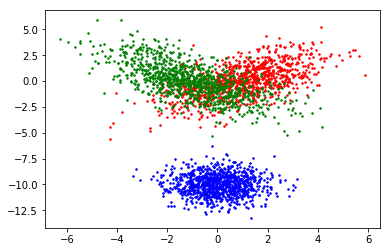

In [4]:
plt.figure()
plt.plot(samples1[:, 0], samples1[:, 1], 'r.', markersize=3)
plt.plot(samples2[:, 0], samples2[:, 1], 'g.', markersize=3)
plt.plot(samples3[:, 0], samples3[:, 1], 'b.', markersize=3)
plt.show()


In [5]:
n_clusters = 3

samples = np.vstack((samples1, samples2, samples3))
prev = np.array([0 for i in samples])
clusters = np.array([0 for i in range(1000)] + [1 for i in range(1000)] + [2 for i in range(1000)])
np.random.shuffle(clusters)
means = np.zeros((n_clusters, samples.shape[1]))
while sum(abs(prev - clusters)) > 0:
    for i in range(n_clusters):
        means[i] = np.mean([s for c, s in zip(clusters, samples) if c == i], axis=0)
    prev, clusters = clusters, prev
    for i, s in enumerate(samples):
        dists = [np.linalg.norm(s - m) for m in means]
        clusters[i] = np.argmin(dists)


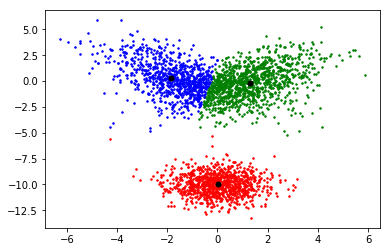

In [6]:
cluster1 = np.array([s for c, s in zip(clusters, samples) if c == 0])
cluster2 = np.array([s for c, s in zip(clusters, samples) if c == 1])
cluster3 = np.array([s for c, s in zip(clusters, samples) if c == 2])

plt.figure()
plt.plot(cluster1[:, 0], cluster1[:, 1], 'r.', markersize=3)
plt.plot(cluster2[:, 0], cluster2[:, 1], 'g.', markersize=3)
plt.plot(cluster3[:, 0], cluster3[:, 1], 'b.', markersize=3)
plt.plot(means[:, 0], means[:, 1], 'k.', markersize=10)
plt.show()
